In [13]:
'''
    Ashish Kumar
        - Word Embedding (Word2Vec)
        - Deep Learning
'''

import os
import sys
import time
import re
import string
import pandas as pd
import unicodecsv as csv
import unicodedata as un
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE

In [31]:
'''
    #Steps before performing Word2Vec
    
    Read all files into one corpus file
    Break down each sentence into new line
    Remove punctuation except selective punctuation
    Lowercase
    Replace numbers with <num>
    Do not remove stop words
    Remove '.'
'''
print()

In [2]:
in_path = './data/data'
out_file = './data/raw_corpus.txt'

# Create a corpus and remove html break 
with open(out_file, 'w', encoding='utf8') as out_f:
    
    for root, dirs, files in os.walk(in_path, topdown=True):
        if(len(files) > 0):
            for each_file in files:
            
                file_path = os.path.join(root, each_file)
                #print(file_path)
                try:
                    content = open(file_path, encoding='utf-8-sig').read().replace('<br />', '')
                    out_f.write(content)
                except IOError as error:
                    print(each_file)
                    
                

out_f.close()

## word2Vec

In [3]:
out_file = './data/raw_corpus.txt'
in_p = open(out_file, encoding='utf-8').read()


In [4]:
# # -*- coding: utf-8 -*-
# # https://stackoverflow.com/a/31505798/4595807
# import re
# alphabets= "([A-Za-z])"
# numbers = "([0-9])"
# symbols = "[,\\\/@#$&%\-'\(\):;=\+*\^\~\[\]\"¿”’´£]"
# prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
# suffixes = "(Inc|Ltd|Jr|Sr|Co)"
# starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
# acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
# websites = "[.](com|net|org|io|gov)"

# def split_into_sentences(text):
#     text = " " + text + "  "
#     text = text.replace("\n"," ")
#     text = re.sub(prefixes,"\\1<prd>",text)
#     text = re.sub(websites,"<prd>\\1",text)
    
#     if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
#     text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
#     text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
#     text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
#     text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
#     text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
#     text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
#     text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
#     text = re.sub(numbers,"<num> ",text)
    

#     if "”" in text: text = text.replace(".”","”.")
#     if "\"" in text: text = text.replace(".\"","\".")
#     if "!" in text: text = text.replace("!\"","\"!")
#     if "?" in text: text = text.replace("?\"","\"?")
#     text = text.replace(".","<stop>")
#     text = text.replace("?","<stop>")
#     text = text.replace("!","<stop>")
#     text = text.replace("<prd>",".")
   
#     text = text.replace("<br />","")
#     text = re.sub(symbols, '', text)
#     text = text.lower()
# #     text = re.sub('^(x\.[0-9]+.*?).*$', '', text)
#     sentences = text.split("<stop>")
#     sentences = sentences[:-1]
#     sentences = [s.strip() for s in sentences if len(s) > 1]
#     return sentences

In [5]:
# sent = split_into_sentences(in_p)
# print(sent[:2])

['alan rickman  emma thompson give good performances with southernnew orleans accents in this detective flick', 'its worth seeing for their scenes and rickmans scene with hal holbrook']


In [6]:
# import nltk 

# total_sent = []
# for each in sent:
#     total_sent.append(each.split())

In [7]:
# print(total_sent[:2])

[['alan', 'rickman', 'emma', 'thompson', 'give', 'good', 'performances', 'with', 'southernnew', 'orleans', 'accents', 'in', 'this', 'detective', 'flick'], ['its', 'worth', 'seeing', 'for', 'their', 'scenes', 'and', 'rickmans', 'scene', 'with', 'hal', 'holbrook']]


In [47]:
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

In [48]:
# Test the tokenizer on a piece of text
sentences = "Mr. James Ph.D. someone told me Dr. Brown is not available today. I will try tomorrow. I am a good boy."
sentences = tokenizer.tokenize(sentences)
print(sentences)

['Mr. James Ph.D. someone told me Dr. Brown is not available today.', 'I will try tomorrow.', 'I am a good boy.']


In [49]:
def remove_period(sents):
    tokenized_sents = []
    for each_sent in sents:
        if len(each_sent) > 1 and each_sent[-1] == '.':
            tokenized_sents.append(each_sent[:-1])
        else:
            tokenized_sents.append(each_sent)
    
    return tokenized_sents

In [51]:
sent = tokenizer.tokenize(in_p)

In [52]:
print(sent[1:10])

["It's worth seeing for their scenes- and Rickman's scene with Hal Holbrook.", 'These three actors mannage to entertain us no matter what the movie, it seems.', 'The plot for the movie shows potential, but one gets the impression in watching the film that it was not pulled off as well as it could have been.', 'The fact that it is cluttered by a rather uninteresting subplot and mostly uninteresting kidnappers really muddles things.', 'The movie is worth a view- if for nothing more than entertaining performances by Rickman, Thompson, and Holbrook.I have seen this movie and I did not care for this movie anyhow.', 'I would not think about going to Paris because I do not like this country and its national capital.', 'I do not like to learn french anyhow because I do not understand their language.', 'Why would I go to France when I rather go to Germany or the United Kingdom?', 'Germany and the United Kingdom are the nations I tolerate.']


In [53]:
sent = remove_period(sent)

In [54]:
'''
    Tokenize each sentence
'''
import nltk
total_sents = []

for each in sent:
    total_sents.append(each.split())

In [55]:
total_sents[1]

["It's",
 'worth',
 'seeing',
 'for',
 'their',
 'scenes-',
 'and',
 "Rickman's",
 'scene',
 'with',
 'Hal',
 'Holbrook']

In [56]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

path = get_tmpfile("./data/word2vec.model")
model = Word2Vec(total_sent, size=50, window=5, min_count=1, workers=4)

In [9]:
model.wv.save_word2vec_format("./data/word2vec.txt")

## Run word2vec from here

In [4]:
model = KeyedVectors.load_word2vec_format('./data/word2vec.txt')

In [5]:
model.similar_by_word('movie')

[('film', 0.9649933576583862),
 ('flick', 0.7705129981040955),
 ('show', 0.7659895420074463),
 ('documentary', 0.7586442232131958),
 ('picture', 0.757072925567627),
 ('series', 0.7148551940917969),
 ('episode', 0.6920992136001587),
 ('it', 0.6787416934967041),
 ('sequel', 0.6767644286155701),
 ('movies', 0.6701979637145996)]

In [19]:
'''
    lametization/ Stemming
'''

'\n    lametization/ Stemming\n'

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(model)

/Users/ashish/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [25]:
import numpy as np
def display_closestwords_tsnescatterplot(model, word, topn):
    vector_dim = model.vector_size
    arr = np.empty((0,vector_dim), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word, topn=topn)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

### Displaying the TOP 20 words which are similar to action. Since it is a movie review dataset,so the words similar to action genere wouldbe drama, suspense, adventure etc. and the model correctly predicts them 

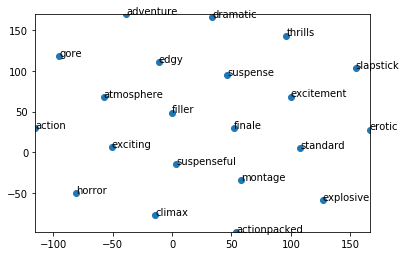

In [30]:
display_closestwords_tsnescatterplot(model, 'action', topn = 20)